# 서울시 유가 정보 분석

In [73]:
import pandas as pd

# file name 합치기
from glob import glob

In [74]:
station_files = glob("../Data/oil/*.xls")
station_files

['../Data/oil/지역_위치별(주유소) (1).xls',
 '../Data/oil/지역_위치별(주유소) (10).xls',
 '../Data/oil/지역_위치별(주유소) (11).xls',
 '../Data/oil/지역_위치별(주유소) (12).xls',
 '../Data/oil/지역_위치별(주유소) (13).xls',
 '../Data/oil/지역_위치별(주유소) (14).xls',
 '../Data/oil/지역_위치별(주유소) (15).xls',
 '../Data/oil/지역_위치별(주유소) (16).xls',
 '../Data/oil/지역_위치별(주유소) (17).xls',
 '../Data/oil/지역_위치별(주유소) (18).xls',
 '../Data/oil/지역_위치별(주유소) (19).xls',
 '../Data/oil/지역_위치별(주유소) (2).xls',
 '../Data/oil/지역_위치별(주유소) (20).xls',
 '../Data/oil/지역_위치별(주유소) (21).xls',
 '../Data/oil/지역_위치별(주유소) (22).xls',
 '../Data/oil/지역_위치별(주유소) (23).xls',
 '../Data/oil/지역_위치별(주유소) (24).xls',
 '../Data/oil/지역_위치별(주유소) (3).xls',
 '../Data/oil/지역_위치별(주유소) (4).xls',
 '../Data/oil/지역_위치별(주유소) (5).xls',
 '../Data/oil/지역_위치별(주유소) (6).xls',
 '../Data/oil/지역

In [75]:
tmp_raw = []
for file_name in station_files:
    tmp = pd.read_excel(file_name,header = 2)
    tmp_raw.append(tmp)
   
station_raw = pd.concat(tmp_raw)    

In [76]:
station_raw.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,2145,2170,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,2183,2207,-
2,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,2305,2183,2199,-
3,서울특별시,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),SK에너지,02-484-6165,N,-,2210,2235,1600
4,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,N,2355,2215,2239,1943


In [77]:
# 필요항목 발췌
stations = pd.DataFrame(
    {'Oil_store' : station_raw['상호'],
    '주소': station_raw['주소'],
    '가격': station_raw['휘발유'],
    '셀프' : station_raw['셀프여부'],
    '상표' : station_raw['상표']
    }
)

stations.head()

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스


In [78]:
'서울특별시 강동구'.split()

['서울특별시', '강동구']

In [81]:
# 여러개의 파일을 합하여 만든 데이터셋이기 때문에 index가 중복 되어 있는 것을 볼 수 있다.
stations = stations.reset_index(drop=True)
stations

,Oil_store,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스
...,...,...,...,...,...
451,대청주유소,서울 강남구 개포로 654 (일원동),2566,N,SK에너지
452,갤러리아주유소,서울 강남구 압구정로 426,2593,N,SK에너지
453,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2595,N,GS칼텍스
454,SK논현주유소,서울 강남구 논현로 747 (논현동),2598,N,SK에너지


In [82]:
stations['주소'] = stations.주소.str.replace('서울특별시','서울')
stations['주소']


0      서울 강동구  천호대로 1246 (둔촌제2동)
1          서울 강동구 구천면로 357 (암사동)
2           서울 강동구 고덕로 168 (명일동)
3           서울 강동구 성안로 102 (성내동)
4            서울 강동구 고덕로 39 (암사동)
                 ...            
451         서울 강남구 개포로 654 (일원동)
452              서울 강남구 압구정로 426
453               서울 강남구 삼성로 335
454         서울 강남구 논현로 747 (논현동)
455        서울 강남구 봉은사로 433 (삼성동)
Name: 주소, Length: 456, dtype: object

In [83]:
# 주유소별 자치구 항목 추가
stations['구'] = [region.split()[1] for region in stations['주소']]
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스,강동구


In [84]:
# 구 컬럼 확인
stations['구'].value_counts()

강남구     34
강서구     32
송파구     31
서초구     30
영등포구    28
양천구     25
성북구     23
구로구     21
동대문구    18
성동구     17
은평구     17
도봉구     16
광진구     16
노원구     15
서대문구    15
관악구     14
강동구     14
중랑구     13
용산구     13
강북구     12
마포구     12
중구      11
금천구     11
종로구      9
동작구      9
Name: 구, dtype: int64

In [85]:
# 구 컬럼 확인
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
       '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

In [86]:
# 가격 정보가 '-'인 곳 확인
stations[stations['가격']=='-']


,Oil_store,주소,가격,셀프,상표,구
97,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
221,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
233,북서울고속주유소,서울 강북구 삼양로 410 (수유동),-,Y,S-OIL,강북구
263,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
272,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
283,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
357,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
358,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
379,서서울고속주유소,서울 구로구 경인로 150 (오류동),-,N,GS칼텍스,구로구


In [97]:
removeIndex = stations[stations['가격']=='-'].index


In [99]:
stations.drop(removeIndex, axis= 0 , inplace = True)
len(stations)

447

In [121]:
stations = stations.astype({'가격':'int'})
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 455
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Oil_store  447 non-null    object
 1   주소         447 non-null    object
 2   가격         447 non-null    int64 
 3   셀프         447 non-null    object
 4   상표         447 non-null    object
 5   구          447 non-null    object
dtypes: int64(1), object(5)
memory usage: 24.4+ KB


In [107]:
import matplotlib.pyplot as plt

In [108]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [118]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145.0,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183.0,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183.0,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210.0,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215.0,N,GS칼텍스,강동구


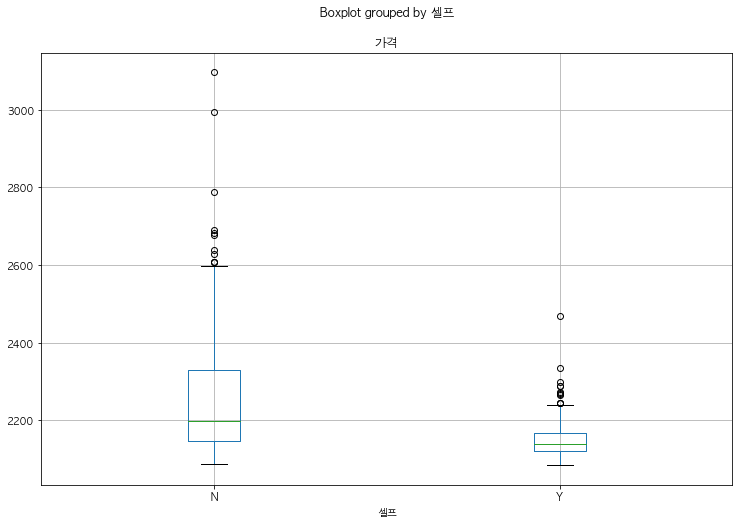

In [120]:
# fig = plt.figure(figsize=(15,5))

stations.boxplot(column= '가격', by='셀프',figsize=(12,8))

plt.show()

In [122]:
import seaborn as sns

In [123]:
stations.head()

,Oil_store,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울 강동구 천호대로 1246 (둔촌제2동),2145,Y,현대오일뱅크,강동구
1,구천면주유소,서울 강동구 구천면로 357 (암사동),2183,N,현대오일뱅크,강동구
2,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),2183,Y,현대오일뱅크,강동구
3,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),2210,N,SK에너지,강동구
4,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),2215,N,GS칼텍스,강동구


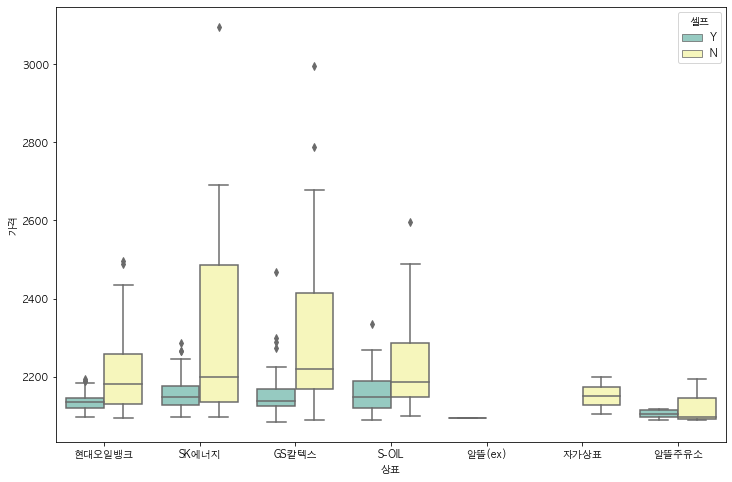

In [128]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(12,8))

sns.boxplot(
    x = '상표',
    y = '가격',
    hue = '셀프',
    data=stations,
    palette='Set3'
)
plt.show()

In [130]:
import warnings
warnings.filterwarnings('ignore')

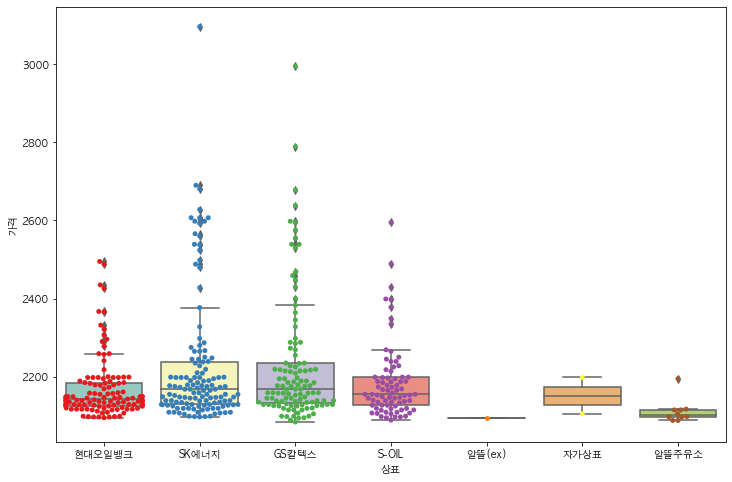

In [134]:
# 상표, 가격, 셀프를 boxplot으로 그리기
plt.figure(figsize=(12,8))

sns.boxplot(
    x = '상표',
    y = '가격',

    data=stations,
    palette='Set3'
)

sns.swarmplot(
    x = '상표',
    y = '가격',
    data=stations,
    palette='Set1'
)

plt.show()

In [137]:
# 가격이 높은 순으로 정렬 (top10)

stations.sort_values('가격',ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
282,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구
246,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구
281,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구
245,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구
244,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구
280,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구
455,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구
243,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구
242,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구
241,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구


In [138]:
# 가장 비싼 가격과 싼 가격 차이
stations['가격'].max() - stations['가격'].min()


1012

In [143]:
import numpy as np

In [164]:
# 구별 가격 평균 높은 순 (top10)
gu_data = pd.pivot_table(stations[['구','가격']], index= '구',aggfunc=np.mean ).sort_values('가격',ascending=False)

### 지도표시


In [154]:
import json
import folium

In [158]:
geo_path = '../Data/skorea_municipalities_geo_simple.json' 
open(geo_path)

<_io.TextIOWrapper name='../Data/skorea_municipalities_geo_simple.json' mode='r' encoding='UTF-8'>

In [171]:

geo_str =json.load(open(geo_path))

map = folium.Map(
    location = [37.5502, 126.982],
    zoom_start= 11,
    tiles = 'Stamen Toner'
)

folium.Choropleth(
    geo_data = geo_str,
    data = gu_data,
    columns = [gu_data.index,'가격'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)

map

In [198]:
# 가격이 제일 비싼 Top10 구성
oil_price_top10 = stations.sort_values(by = '가격', ascending=False).head(10).reset_index(drop=True)

In [199]:
# 가격이 제일 싼 Top10 구성
oil_price_bottom10 = stations.sort_values(by = '가격', ascending=True).head(10).reset_index(drop=True)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
0,㈜지에스이앤알 미아주유소,서울 강북구 도봉로 122 (미아동),2084,Y,GS칼텍스,강북구
1,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2088,N,알뜰주유소,강서구
2,화곡역주유소,서울 강서구 강서로 154 (화곡동),2088,Y,알뜰주유소,강서구
3,지에스이앤알 직영 서울주유소,서울 양천구 신정로 236 (신정동),2089,N,GS칼텍스,양천구
4,현대주유소,서울 양천구 남부순환로 372 (신월동),2089,Y,S-OIL,양천구
5,수유동주유소,서울 강북구 도봉로 395 (수유동),2094,Y,GS칼텍스,강북구
6,(주)MS에너지,서울 영등포구 대림로 230,2095,N,현대오일뱅크,영등포구
7,대득에너지(금천셀프주유소),서울 금천구 시흥대로 81 (시흥동),2095,Y,GS칼텍스,금천구
8,만남의광장주유소,서울 서초구 양재대로12길 73-71,2095,Y,알뜰(ex),서초구
9,씨앤에스에너지㈜ 미아셀프주유소,서울 강북구 도봉로 200 (미아동),2095,Y,S-OIL,강북구


In [200]:
import urllib.request

top_lats = []
top_lngs = []
bottom_lats = []
bottom_lngs = []

for address in oil_price_top10['주소']:

    client_id = "84zdgtnty4"
    client_secret= "T9d39jjdBNbj2YsxiEgdBSyzJisfDOVTgeYLkHBq"

    encText = urllib.parse.quote(address)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    import json
    data1 = json.loads(enText)

    top_lngs.append(data1['addresses'][0]['x'])
    top_lats.append(data1['addresses'][0]['y'])

for address in oil_price_bottom10['주소']:

    client_id = "84zdgtnty4"
    client_secret= "T9d39jjdBNbj2YsxiEgdBSyzJisfDOVTgeYLkHBq"

    encText = urllib.parse.quote(address)
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + encText
    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)

    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode == 200:
        response_body = response.read()
        enText = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    import json
    data1 = json.loads(enText)

    bottom_lngs.append(data1['addresses'][0]['x'])
    bottom_lats.append(data1['addresses'][0]['y'])



In [201]:
oil_price_top10['lat'] = top_lats
oil_price_top10['lng'] = top_lngs
oil_price_bottom10['lat'] = bottom_lats
oil_price_bottom10['lng'] = bottom_lngs
oil_price_top10


,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,서남주유소,서울 중구 통일로 30,3096,N,SK에너지,중구,37.5583881,126.9721764
1,서계주유소,서울 용산구 청파로 367 (청파동),2995,N,GS칼텍스,용산구,37.5523505,126.9689935
2,필동주유소,서울 중구 퇴계로 196 (필동2가),2789,N,GS칼텍스,중구,37.5609181,126.9936785
3,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2690,N,SK에너지,용산구,37.5502224,126.9724921
4,한석주유소,서울 용산구 이촌로 164,2681,N,SK에너지,용산구,37.5215820,126.9653682
5,약수주유소,서울 중구 다산로 173,2678,N,GS칼텍스,중구,37.5590707,127.0126262
6,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2638,N,GS칼텍스,강남구,37.5115603,127.0471387
7,(주)남경주유소,서울 용산구 녹사평대로11길 24,2628,N,SK에너지,용산구,37.5222584,126.9931989
8,에너비스,서울 용산구 한남대로 82 (한남동),2607,N,SK에너지,용산구,37.5360079,127.0061496
9,한남지점,서울 용산구 한남대로21길 4 (한남동),2607,N,SK에너지,용산구,37.5347069,127.0061196


In [220]:
geo_str =json.load(open(geo_path))

map = folium.Map(
    location = [37.5502, 126.982],
    zoom_start= 11,
    # tiles = 'Stamen Toner'
)

folium.Choropleth(
    geo_data = geo_str,
    data = gu_data,
    columns = [gu_data.index,'가격'],
    fill_color='PuRd',
    key_on='feature.id'
).add_to(map)

for n in range(len(oil_price_top10)):
    
    
    folium.Marker(
        [oil_price_top10.lat[n], oil_price_top10.lng[n]],
        popup=oil_price_top10.Oil_store[n],
        icon=folium.Icon(icon='star',color = 'blue')
    ).add_to(map)
    folium.CircleMarker(
        [oil_price_top10.lat[n], oil_price_top10.lng[n]],
        popup=oil_price_top10.Oil_store[n],
        color = 'blue',
        fill = True,
        fill_color = 'blue',
        fill_opacity = 0.3,
    ).add_to(map)


for n in range(len(oil_price_top10)):
    folium.Marker(
        [oil_price_bottom10.lat[n], oil_price_bottom10.lng[n]],
        popup=oil_price_bottom10.Oil_store[n],
        icon=folium.Icon(color = 'red')
    ).add_to(map)
    folium.CircleMarker(
        [oil_price_bottom10.lat[n], oil_price_bottom10.lng[n]],
        popup=oil_price_bottom10.Oil_store[n],
        color = 'red',
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.3,
    ).add_to(map)

map

In [ ]:
# Top10의 위도 경도 찾기
station_lat = [] # 주유소의 위도 
station_lng = [] # 주유소의 경도

import urllib.request
import json

client_id = "84zdgtnty4"
client_secret= "T9d39jjdBNbj2YsxiEgdBSyzJisfDOVTgeYLkHBq"

    

In [216]:

url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode?query=" + 'abc'
request = urllib.request.Request(url)
request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
request.add_header("X-NCP-APIGW-API-KEY",client_secret)

print(request.headers)

{'X-ncp-apigw-api-key-id': '84zdgtnty4', 'X-ncp-apigw-api-key': 'T9d39jjdBNbj2YsxiEgdBSyzJisfDOVTgeYLkHBq'}
